<a href="https://colab.research.google.com/github/rahulsing/pytorch_demo/blob/master/01_pytorch_LinearRegression_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_train=np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train=np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

x : featur
y : label
ramdon generated x and y for a simple linear regression example

<function matplotlib.pyplot.show>

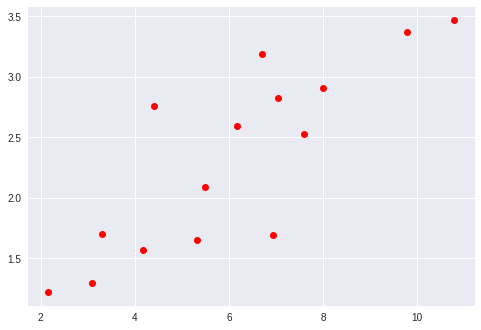

In [102]:
plt.plot(x_train,y_train,'ro',label='Orignal data')
plt.show

Convert x and y data to tensor

In [0]:

# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [103]:
X_train=torch.from_numpy(x_train)
Y_train=torch.from_numpy(y_train)

print('requires_grad for X_train: ',X_train.requires_grad)
print('requires_grad for Y_train: ',Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


create a NN with single layer and 100 neurons and ReLU activation

In [0]:
input_size=1 # feature
hidden_size=100
output_size=1
learning_rate=1e-6 # factor by which we adjust our weights for every epoch 
  

In [106]:
# random array of weights, matrix of input X Hidden
w1=torch.rand(input_size,hidden_size,requires_grad=True)
w1.shape

# 100 neurons and 1 feature
#torch.Size([1, 100])

torch.Size([1, 100])

In [107]:
w2=torch.rand(hidden_size,output_size,requires_grad=True)
w2.shape

#torch.Size([100, 1])

torch.Size([100, 1])

In [108]:
type(w1.data.zero_)


builtin_function_or_method

In [109]:
type(learning_rate)

float

In [110]:
# run training for 300 epoch
for iter in range(1,300):
  # manually crafter single layer neural network
  # first :  Affine transformation :  X_train.mm(w1)
  # mm : matrix multiplication
  # second : ReLU Activation funcation : clamp(min=0) , cplam negative number to zero i.e ReLU ativ fun
  # 
  y_pred=X_train.mm(w1).clamp(min=0).mm(w2)
  
  # linear regration function
  # MSE loss i.e. sum of the square of the differences between actual predicted values
  loss=(y_pred-Y_train).pow(2).sum()
  
  if iter % 30 ==0:
    print(iter,loss.item())
  
  #use autograd for an automated way of implementing the backward pass through the neural network
  # computes gradient of loss with respect to all tensors which have requires_grad=True
  loss.backward()
  
  #manually updating weights using gradients, stop atuograd tracking history on tensors
  with torch.no_grad():
    #w1-=learning_rate * float(w1.grad or 0) #w1.grad
    w1 -= learning_rate * (w1.grad) #w1.grad
    w2 -= learning_rate * (w2.grad) #w2.grad
    
    # once model weights are adjusted, manully zero out the gradients on the weights, for the next forward pass 
    #float(w1.grad or 0).zero_()
    #w1.data.zero_()
    w1.grad.zero_()
    w2.grad.zero_()

30 14032.4638671875
60 982.8765869140625
90 79.47832489013672
120 9.781448364257812
150 4.137667179107666
180 3.674114942550659
210 3.636035442352295
240 3.6329076290130615
270 3.6326470375061035


In [111]:
print('w1 ',w1)
print('w2 ',w2)

w1  tensor([[ 0.8228, -0.0001,  0.5459,  1.0708,  0.3256, -0.0003,  0.1301,  0.0888,
         -0.0033,  0.5692,  0.5316,  0.3982, -0.0018,  0.2555,  0.8516,  0.3539,
          0.4999, -0.0001, -0.0009,  0.2674, -0.0077,  0.1335,  0.1754,  0.1754,
          0.1501,  0.8668, -0.0063, -0.0008,  0.1951, -0.0001,  0.2964,  0.1239,
          0.4697,  0.4923,  0.6259, -0.0064,  0.6256, -0.0033,  0.3428,  0.2462,
          0.6545,  0.5742,  0.6663,  0.0360, -0.0052,  0.2478,  0.0110,  0.6091,
          0.0406,  0.8902,  0.2559,  0.2731,  0.7475,  0.4643,  0.2175,  0.9712,
         -0.0043, -0.0014, -0.0058,  0.3675,  0.9358, -0.0026,  0.8398,  0.7515,
         -0.0035,  0.3629,  0.3725,  0.7134, -0.0034,  0.3484,  0.4476, -0.0117,
         -0.0042,  0.1429,  0.0591,  0.1038,  0.7724,  0.3714, -0.0124, -0.0007,
          0.7035,  0.0907,  0.0570, -0.0039, -0.0327,  0.0813,  0.0331,  1.0575,
          0.5589,  0.0628, -0.0087,  0.5715,  0.6873,  0.0247,  0.9274,  0.7871,
          0.7680,  0.532

In [112]:
x_train_tensor=torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [114]:
#calcuate the predicted values using the trained weights
predicted_in_tensor=x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2117],
        [1.6156],
        [2.0194],
        [2.4637],
        [2.5445],
        [1.5304],
        [3.5906],
        [2.2699],
        [2.7868],
        [0.7957],
        [2.5856],
        [3.9621],
        [1.9508],
        [2.9363],
        [1.1382]], grad_fn=<MmBackward>)

In [117]:
# detach the tensor from current graph so no  gredient are computed on the new tensor
predicted=predicted_in_tensor.detach().numpy()
predicted

array([[1.2116663 ],
       [1.6155553 ],
       [2.019445  ],
       [2.4637222 ],
       [2.5444999 ],
       [1.5303721 ],
       [3.5905724 ],
       [2.269855  ],
       [2.7868328 ],
       [0.79566085],
       [2.5856237 ],
       [3.9621487 ],
       [1.9507837 ],
       [2.9362712 ],
       [1.1382322 ]], dtype=float32)

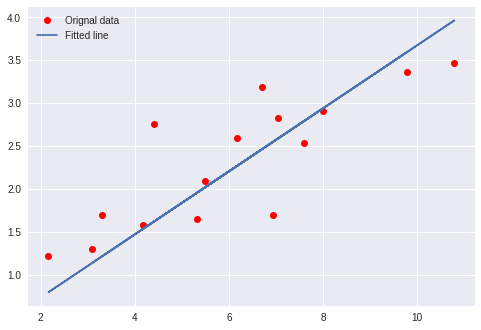

In [118]:
plt.plot(x_train,y_train,'ro',label='Orignal data')
plt.plot(x_train,predicted,label='Fitted line')
plt.legend()
plt.show()